In [1]:
#actual algorithm

import numpy as np
from datetime import datetime
from multiprocessing import Pool
import itertools
from joblib import dump, load
import sys
from matplotlib import pyplot as plt

# Perceptron function
def perceptron(a, N, n_max):
    """a - alpha
    N - amount of features
    n_max = max number of epochs"""

    P = int(a * N) # Num of samples
    xi = []
    S = []

    for _ in range(P):
        # Draw N random samples from Gaussian distribution.
        mu, sigma = 0, 0.1
        s = np.random.normal(mu, sigma, N)
        xi.append(s)

        label = 1 if np.random.rand() < 0.5 else -1
        S.append(label)

    w = np.zeros(N) # weights. intiially set to 0
    for _ in range(n_max):
        scores = np.zeros(P, dtype=int)

        for mu_t in range(P):
            e_mu_t = np.dot(xi[mu_t], w) * S[mu_t]

            # predict
            scores[mu_t] = 1 if e_mu_t > 0 else 0

            # update weight matrix
            if e_mu_t <= 0:
                w += (1/N * xi[mu_t] * S[mu_t])
    
        # compare
        score = np.sum(scores)
        success = score == P

        # print('Epoch {} score [{}/{}]'.format(epoch, score, P))
        if success:
            return 1

    return 0


# Perceptron parameters
alphas = np.linspace(0.75, 3, 10)
nmax = 100      # max number of epochs - before stopping without convergence
N = 10          # amount of features - to use for the dataset
nd = 50         # number of datasets - to generate for each alpha
resfn = './nmax={},N={},nd={}.pickle'.format(nmax, N, nd) # results filename

0.75
0.7727272727272727
0.7954545454545454
0.8181818181818181
0.8409090909090909
0.8636363636363636
0.8863636363636364
0.9090909090909091
0.9318181818181819
0.9545454545454546
0.9772727272727273
1.0
1.0227272727272727
1.0454545454545454
1.0681818181818181
1.0909090909090908
1.1136363636363638
1.1363636363636362
1.1590909090909092
1.1818181818181819
1.2045454545454546
1.2272727272727273
1.25
1.2727272727272727
1.2954545454545454
1.3181818181818183
1.3409090909090908
1.3636363636363638
1.3863636363636362
1.4090909090909092
1.4318181818181819
1.4545454545454546
1.4772727272727273
1.5
1.5227272727272727
1.5454545454545454
1.5681818181818183
1.5909090909090908
1.6136363636363638
1.6363636363636362
1.6590909090909092
1.6818181818181819
1.7045454545454546
1.7272727272727273
1.75
1.7727272727272727
1.7954545454545454
1.8181818181818181
1.8409090909090908
1.8636363636363638
1.8863636363636365
1.9090909090909092
1.9318181818181819
1.9545454545454546
1.9772727272727273
2.0
2.0227272727272725
2.04

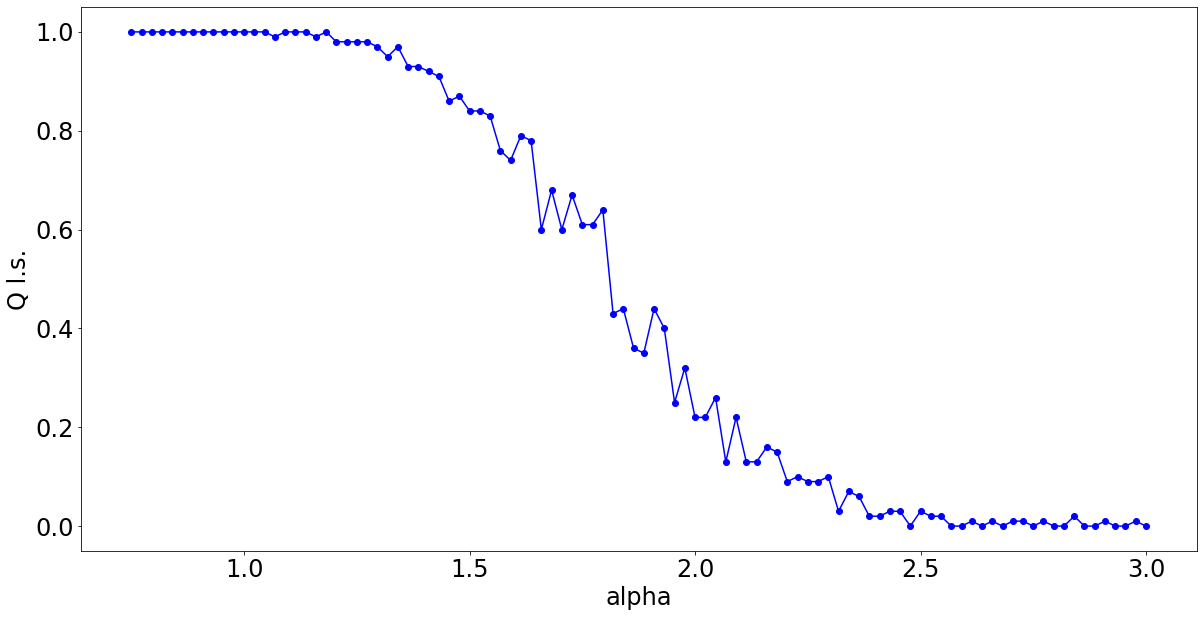

In [4]:
#generate data and plot plot1

alphas = np.linspace(0.75, 3, 100)

nmax = 100      # max number of epochs - before stopping without convergence
N = 20          # amount of features - to use for the dataset
nd = 100     # number of datasets - to generate for each alpha

convergence_av_basic = np.empty([0,100])

for i in alphas:
    convergence = np.empty([0, 1])
    for j in range(nd):
        convergence = np.append(convergence,(perceptron(i, N, nmax)))
    convergence_av_basic = np.append(convergence_av_basic,np.mean(convergence))
    print(i)

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 24})
plt.plot(alphas, convergence_av_basic, marker='o', linestyle='-', color='b')
plt.xlabel('alpha')
plt.ylabel('Q l.s.')
plt.show()

In [8]:
#generate data for plot3

nmax = 300      # max number of epochs - before stopping without convergence
N = 100          # amount of features - to use for the dataset
nd = 300     # number of datasets - to generate for each alpha
alphas = np.linspace(0.75, 3, 300)

convergence_av_5 = np.empty([0,300])
convergence_av_20 = np.empty([0,300])
convergence_av_100 = np.empty([0,300])

for i in alphas:
    convergence = np.empty([0, 1])
    for j in range(nd):
        convergence = np.append(convergence,(perceptron(i, 5, nmax)))
    convergence_av_5 = np.append(convergence_av_5,np.mean(convergence))
    print(i)
    
for i in alphas:
    convergence = np.empty([0, 1])
    for j in range(nd):
        convergence = np.append(convergence,(perceptron(i, 20, nmax)))
    convergence_av_20 = np.append(convergence_av_20,np.mean(convergence))
    print(i)
    
for i in alphas:
    convergence = np.empty([0, 1])
    for j in range(nd):
        convergence = np.append(convergence,(perceptron(i, 100, nmax)))
    convergence_av_100 = np.append(convergence_av_100,np.mean(convergence))
    print(i)

0.75
0.7575250836120402
0.7650501672240803
0.7725752508361204
0.7801003344481605
0.7876254180602007
0.7951505016722408
0.802675585284281
0.810200668896321
0.8177257525083612
0.8252508361204014
0.8327759197324415
0.8403010033444815
0.8478260869565217
0.8553511705685619
0.862876254180602
0.8704013377926422
0.8779264214046822
0.8854515050167224
0.8929765886287626
0.9005016722408027
0.9080267558528428
0.9155518394648829
0.9230769230769231
0.9306020066889632
0.9381270903010034
0.9456521739130435
0.9531772575250836
0.9607023411371237
0.9682274247491639
0.975752508361204
0.9832775919732442
0.9908026755852843
0.9983277591973244
1.0058528428093645
1.0133779264214047
1.0209030100334449
1.028428093645485
1.0359531772575252
1.0434782608695652
1.0510033444816054
1.0585284280936456
1.0660535117056855
1.0735785953177257
1.0811036789297659
1.088628762541806
1.0961538461538463
1.1036789297658862
1.1112040133779264
1.1187290969899666
1.1262541806020068
1.1337792642140467
1.141304347826087
1.148829431438

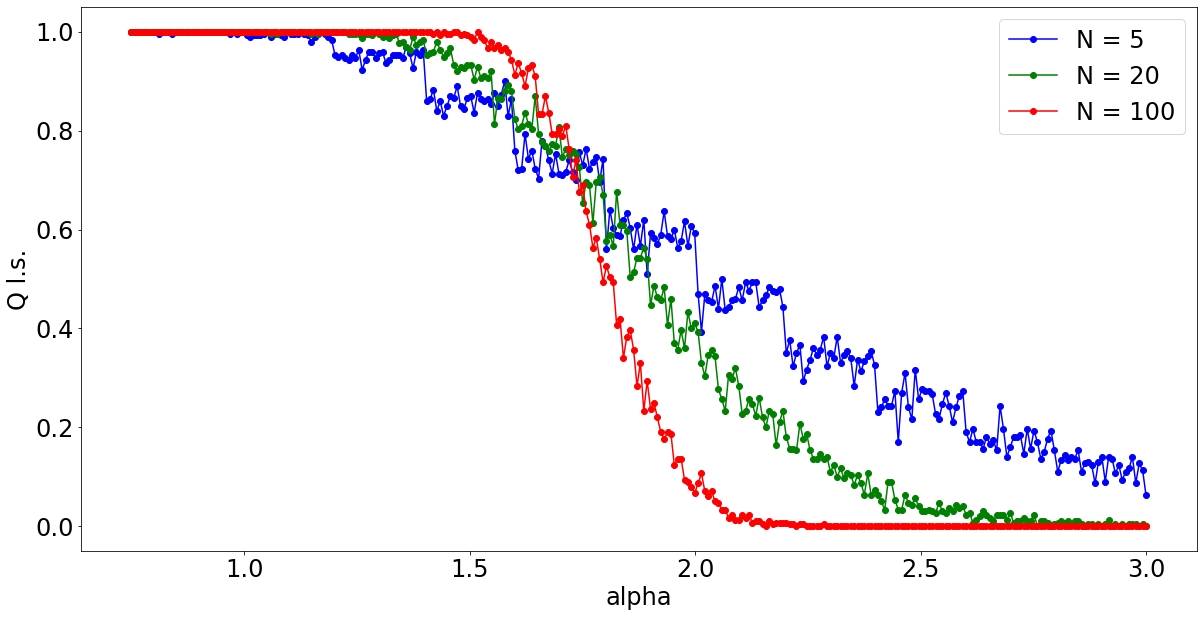

In [9]:
#plot plot3

alphas = np.linspace(0.75, 3, 300)

plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(20,10))
plt.plot(alphas, convergence_av_5, marker='o', linestyle='-', color='b')
plt.plot(alphas, convergence_av_20, marker='o', linestyle='-', color='g')
plt.plot(alphas, convergence_av_100, marker='o', linestyle='-', color='r')
plt.xlabel('alpha')
plt.ylabel('Q l.s.')

plt.legend(['N = 5', 'N = 20', 'N = 100'], loc='upper right')
plt.show()

In [6]:
#generate data for plot2

nmax = 100      # max number of epochs - before stopping without convergence
N = 100          # amount of features - to use for the dataset
nd = 100     # number of datasets - to generate for each alpha
alphas = np.linspace(0.75, 3, 100)

convergence_nd_100 = np.empty([0,100])
convergence_nd_500 = np.empty([0,100])

for i in alphas:
    convergence = np.empty([0, 1])
    for j in range(nd):
        convergence = np.append(convergence,(perceptron(i, N, 100)))
    convergence_nd_100 = np.append(convergence_nd_100,np.mean(convergence))
    print(i)
    
    
for i in alphas:
    convergence = np.empty([0, 1])
    for j in range(nd):
        convergence = np.append(convergence,(perceptron(i, N, 500)))
    convergence_nd_500 = np.append(convergence_nd_500,np.mean(convergence))
    print(i)

0.75
0.7727272727272727
0.7954545454545454
0.8181818181818181
0.8409090909090909
0.8636363636363636
0.8863636363636364
0.9090909090909091
0.9318181818181819
0.9545454545454546
0.9772727272727273
1.0
1.0227272727272727
1.0454545454545454
1.0681818181818181
1.0909090909090908
1.1136363636363638
1.1363636363636362
1.1590909090909092
1.1818181818181819
1.2045454545454546
1.2272727272727273
1.25
1.2727272727272727
1.2954545454545454
1.3181818181818183
1.3409090909090908
1.3636363636363638
1.3863636363636362
1.4090909090909092
1.4318181818181819
1.4545454545454546
1.4772727272727273
1.5
1.5227272727272727
1.5454545454545454
1.5681818181818183
1.5909090909090908
1.6136363636363638
1.6363636363636362
1.6590909090909092
1.6818181818181819
1.7045454545454546
1.7272727272727273
1.75
1.7727272727272727
1.7954545454545454
1.8181818181818181
1.8409090909090908
1.8636363636363638
1.8863636363636365
1.9090909090909092
1.9318181818181819
1.9545454545454546
1.9772727272727273
2.0
2.0227272727272725
2.04

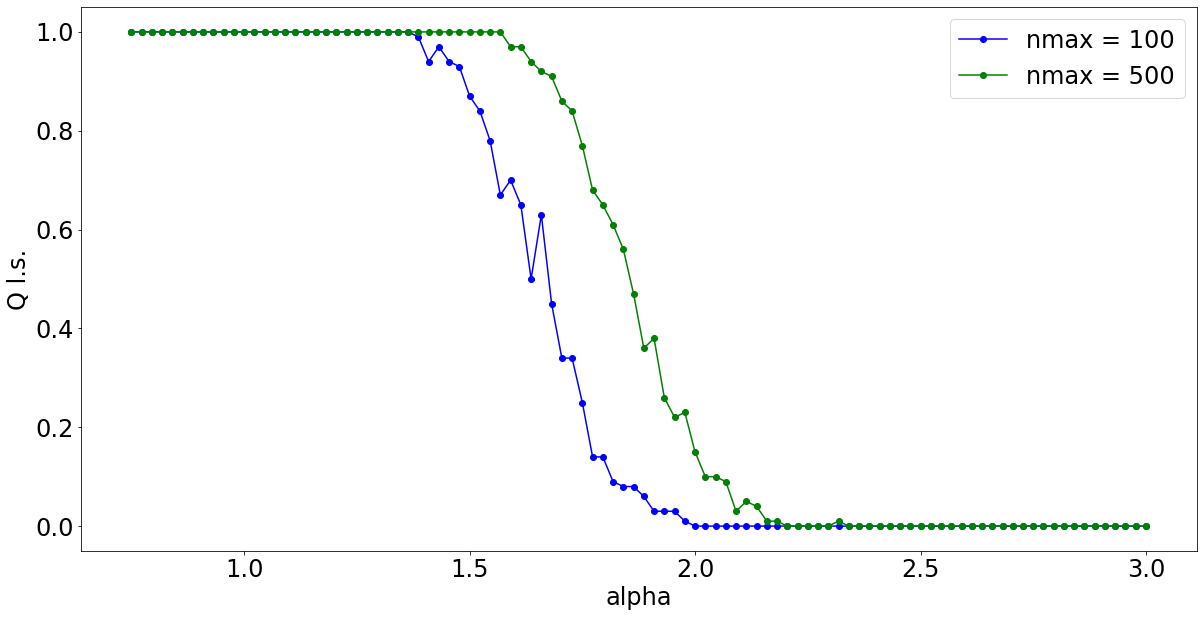

In [7]:
#plot plot2

alphas = np.linspace(0.75, 3, 100)

plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(20,10))
plt.plot(alphas, convergence_nd_100, marker='o', linestyle='-', color='b')
plt.plot(alphas, convergence_nd_500, marker='o', linestyle='-', color='g')
plt.xlabel('alpha')
plt.ylabel('Q l.s.')

plt.legend(['nmax = 100', 'nmax = 500'], loc='upper right')
plt.show()